# **Importing packages and analysis of Data**

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import community

In [ ]:
# Read the CSV file
df = pd.read_csv('/content/politicians_scraped_data.csv')
df=df.sample(n=300)
df.head(5)

st_name  pc_no     pc_name pc_type                 cand_name  \
57082   Uttar Pradesh     83     Kairana     GEN                    Savita   
37971     Maharashtra     13  Chandrapur     NaN  Chatap Waman Sadashivrao   
48024       Rajasthan     25      Nagaur     GEN   Ram Raghunath Choudhary   
9804            Bihar     44      Chatra     GEN              Vijai Paswan   
2383   Andhra Pradesh     30   Hyderabad     GEN          Satnarayan Sarma   

      cand_sex                 partyname partyabbre  
57082        F               Independent        IND  
37971        M   Swatantra Bharat Paksha       STBP  
48024        M  Indian National Congress        INC  
9804         M               Independent        IND  
2383         M               Independent        IND

In [ ]:
df.shape

(300, 8)

In [ ]:
df.describe

<bound method NDFrame.describe of                                    st_name  pc_no      pc_name pc_type  \
57082                        Uttar Pradesh     83      Kairana     GEN   
37971                          Maharashtra     13   Chandrapur     NaN   
48024                            Rajasthan     25       Nagaur     GEN   
9804                                 Bihar     44       Chatra     GEN   
2383                        Andhra Pradesh     30    Hyderabad     GEN   
...                                    ...    ...          ...     ...   
3974                        Andhra Pradesh     23     Cuddapah     GEN   
66284                        Uttar Pradesh     67         Etah     GEN   
12640                                Bihar     15    Darbhanga     GEN   
39983  National Capital Territory Of Delhi      3  Outer Delhi     GEN   
12017                                Bihar      4    Gopalganj     GEN   

                      cand_name cand_sex                 partyname partyabbre

In [ ]:
df.isna().sum()

st_name        0
pc_no          0
pc_name        0
pc_type       26
cand_name      0
cand_sex       3
partyname      0
partyabbre     0
dtype: int64

In [ ]:
df.dtypes

st_name       object
pc_no          int64
pc_name       object
pc_type       object
cand_name     object
cand_sex      object
partyname     object
partyabbre    object
dtype: object

In [ ]:
df=df.drop(['pc_no','pc_name','pc_type','cand_sex'], axis=1)
df.isna().sum()

st_name       0
cand_name     0
partyname     0
partyabbre    0
dtype: int64

# **Creating graph and adding nodes and edges**

In [ ]:
# Create an empty undirected graph
graph = nx.Graph()

In [ ]:
# Add nodes to the graph for politicians
for _, row in df.iterrows():
    name = row['cand_name']
    party = row['partyabbre']
    state = row['st_name']
    graph.add_node(name, party=party, state=state)

In [ ]:
# Add edges to the graph based on party affiliations
for _, row in df.iterrows():
    name = row['cand_name']
    party = row['partyabbre']
    state = row['st_name']

    # Find other politicians from the same party in the same state
    party_state_df = df[(df['partyabbre'] == party) & (df['st_name'] == state)]

    # Add edges between the current politician and others from the same party
    for _, party_state_row in party_state_df.iterrows():
        party_state_name = party_state_row['cand_name']
        if name != party_state_name:
            graph.add_edge(name, party_state_name)

# **Plotting the graph**

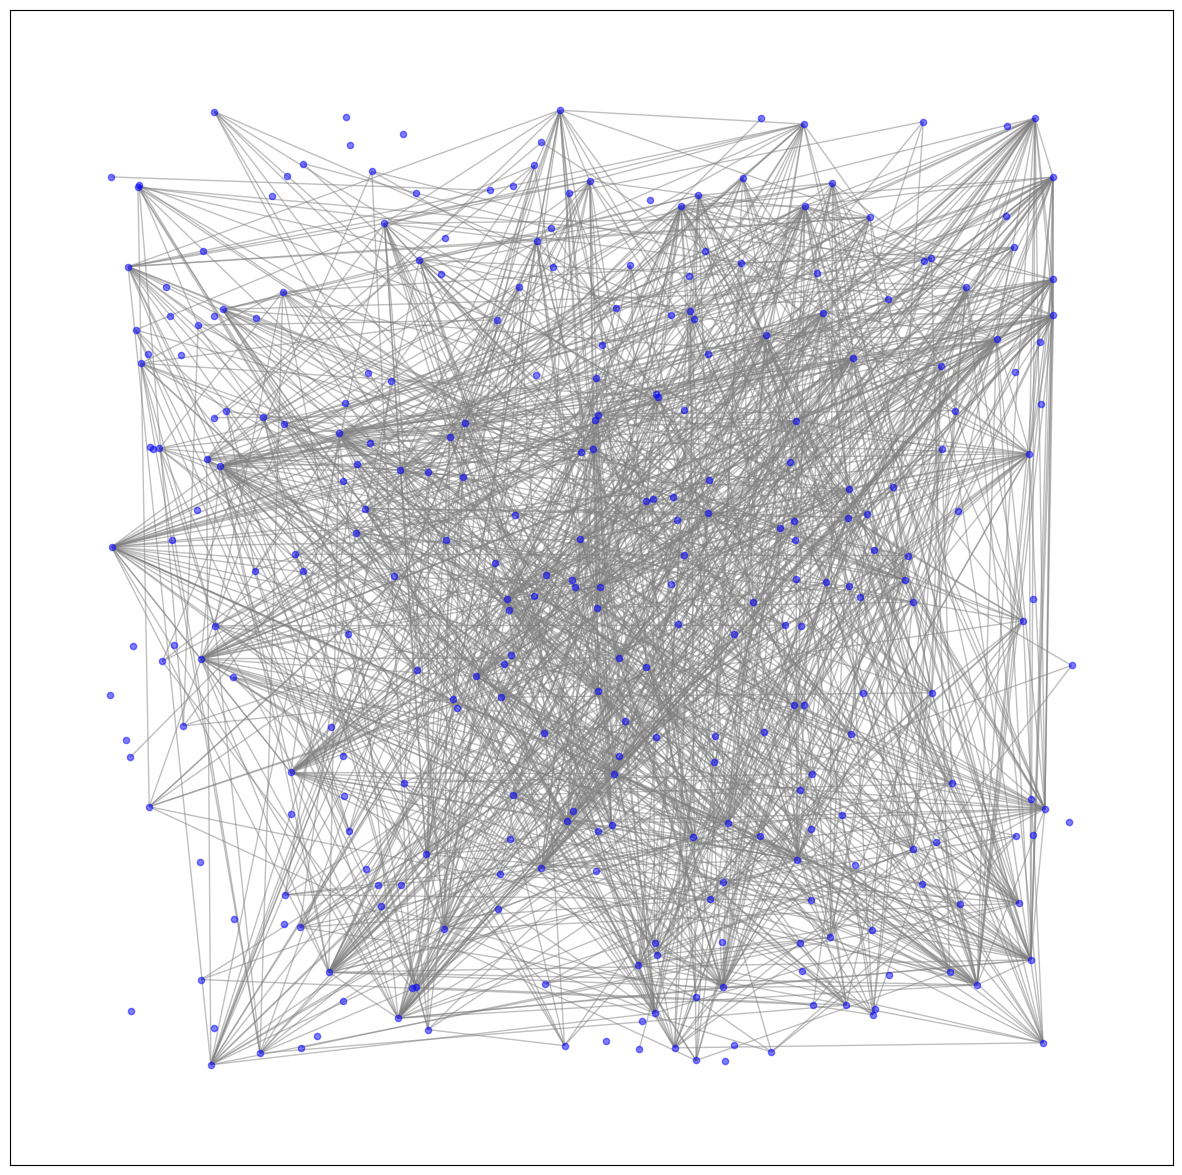

In [ ]:
pos = nx.random_layout(graph)
plt.figure(figsize=(15,15))
nx.draw_networkx(graph, node_size=20, pos=pos, with_labels=False, node_color='blue', edge_color='gray',alpha=0.5)

# **Centrality Analysis**

## **Degree Centrality**

In [ ]:
degree_centrality = nx.degree_centrality(graph)
sorted_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)
highest_degree_node = sorted_nodes[0]
print("\n\n10 most Influential nodes for Degree Centrality:\n")
for i in range(10):
  print(sorted_nodes[i])

print("\n\nHighest degree central node:\n", highest_degree_node)



10 most Influential nodes for Degree Centrality:

Savita
Lahiri Singh
Nazar Imam
Naresh Chandra Sagar Chandra Bagh Bahara Wale
Amar Jeet
Ram Kumar
Paras
Lalji Shukla
Dayaram (Hijra)
Bhuaneshwar


Highest degree central node:
 Savita


## **Betweennes Centrality**

In [ ]:
betweenness_centrality = nx.betweenness_centrality(graph)
sorted_nodes = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)
highest_betweenness_node = sorted_nodes[0]
print("\n\n10 most Influential Nodes for Betweennes Centrality:\n")
for i in range(10):
  print(sorted_nodes[i])


print("\nHighest betweenness central node:\n", highest_betweenness_node)



10 most Influential Nodes for Betweennes Centrality:

Savita
Chatap Waman Sadashivrao
Ram Raghunath Choudhary
Vijai Paswan
Satnarayan Sarma
Krishan Kumar
Lahiri Singh
Shariff. M. K
Satya Kumar Singh
Narayan Gangaram Patil

Highest betweenness central node:
 Savita


## **Eigenvector centrality**

In [ ]:
eigenvector_centrality = nx.eigenvector_centrality(graph)
sorted_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)
highest_eigen_node = sorted_nodes[0]
print("\n\n10 most Influential Nodes for Eigenvector Centrality:\n")
for i in range(10):
  print(sorted_nodes[i])


print("\nHighest Eigenvector central node:\n", highest_eigen_node)



10 most Influential Nodes for Eigenvector Centrality:

Savita
Lahiri Singh
Nazar Imam
Naresh Chandra Sagar Chandra Bagh Bahara Wale
Amar Jeet
Ram Kumar
Paras
Lalji Shukla
Dayaram (Hijra)
Bhuaneshwar

Highest Eigenvector central node:
 Savita


## **Page Rank**

In [ ]:
pagerank = nx.pagerank(graph)
sorted_nodes = sorted(pagerank, key=pagerank.get, reverse=True)
highest_pagerank=sorted_nodes[0]
print("10 most Influential Nodes for Page Rank:\n")
for i in range(10):
  print(sorted_nodes[i])

10 most Influential Nodes for Page Rank:

Vijai Paswan
Satnarayan Sarma
Satya Kumar Singh
M. Ramchander Rao
Keshav Rao Jadhav
S. China Addanki
Vemavarapu Samuel
Lal Bahadur Ram Azad
Gogu Laxmaiah
Braj Kisor Sahni


# **Plotting The Highest Central Politicians**

{'Vijai Paswan': Text(0.12295389, 0.14361553, 'Vijai Paswan')}

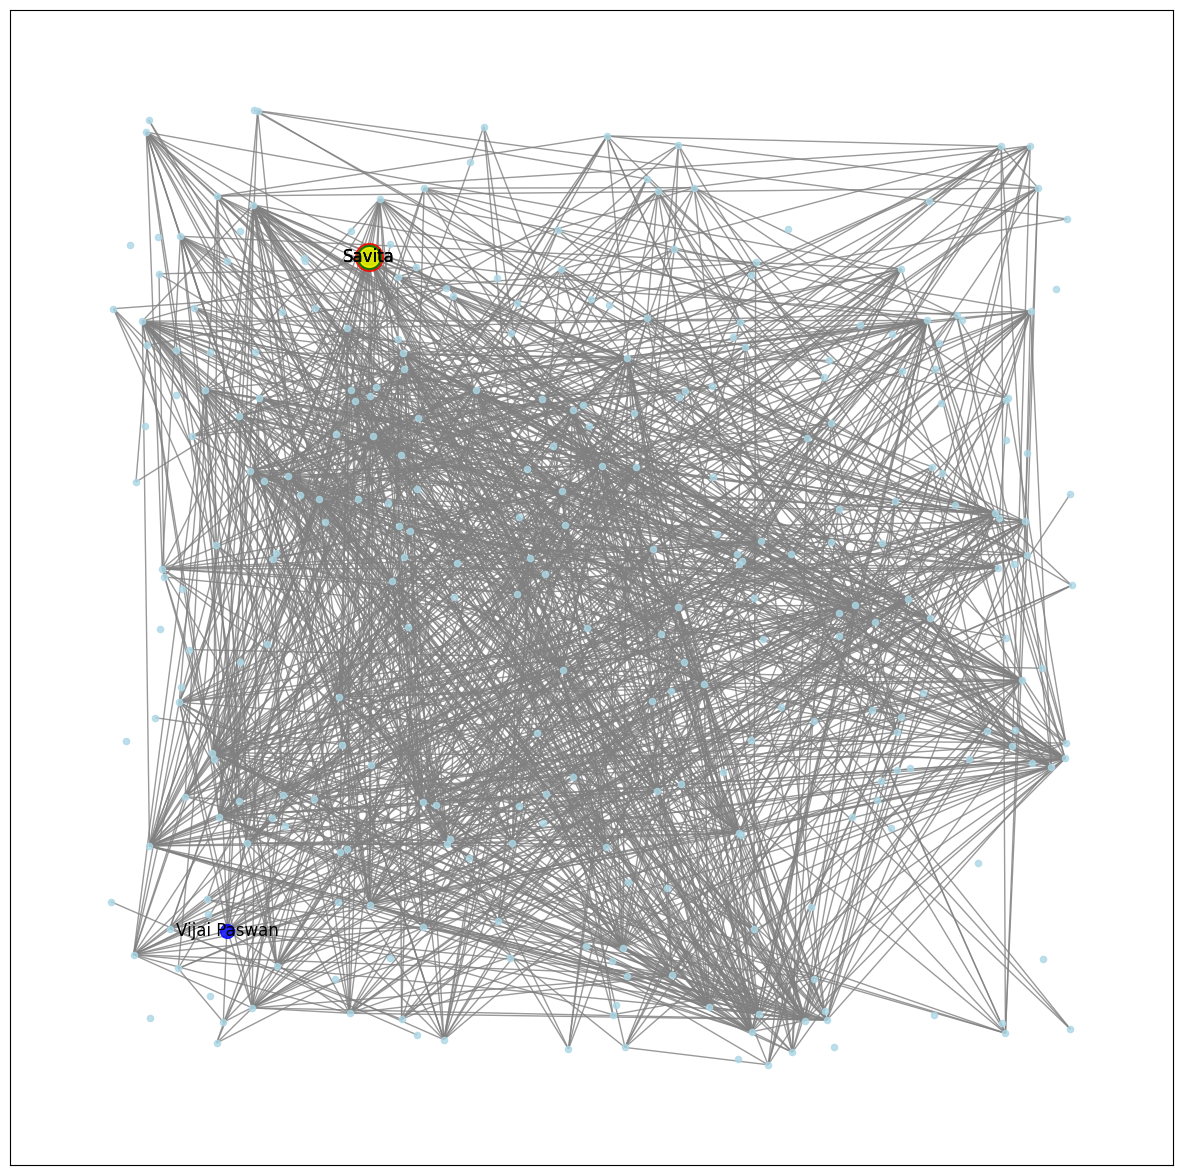

In [ ]:
pos = nx.random_layout(graph)
plt.figure(figsize=(15,15))
nx.draw_networkx(graph, node_size=20, pos=pos, with_labels=False, node_color='lightblue', edge_color='gray',alpha=0.8)

nx.draw_networkx_nodes(graph, nodelist=[highest_degree_node], node_size=400, pos=pos, node_color='red',alpha=0.8)
nx.draw_networkx_labels(graph, pos=pos, labels={highest_degree_node: highest_degree_node}, font_color='black')

nx.draw_networkx_nodes(graph, nodelist=[highest_betweenness_node], node_size=300, pos=pos, node_color='green',alpha=0.8)
nx.draw_networkx_labels(graph, pos=pos, labels={highest_betweenness_node: highest_betweenness_node}, font_color='black')

nx.draw_networkx_nodes(graph, nodelist=[highest_eigen_node], node_size=200, pos=pos, node_color='yellow',alpha=0.8)
nx.draw_networkx_labels(graph, pos=pos, labels={highest_eigen_node: highest_eigen_node}, font_color='black')

nx.draw_networkx_nodes(graph, nodelist=[highest_pagerank], node_size=100, pos=pos, node_color='blue',alpha=0.8)
nx.draw_networkx_labels(graph, pos=pos, labels={highest_pagerank: highest_pagerank}, font_color='black')

# **Result Of Centrality Analysis**

In [ ]:
print("\t\t\t\t\t\t Result From Centrality Measure")

print("\n\nHighest degree central node:\n", highest_degree_node)
print("\nHighest betweenness central node:\n", highest_betweenness_node)
print("\nHighest eigen central node:\n", highest_eigen_node)
print("\nHighest  pageranked node:\n", highest_pagerank)

						 Result From Centrality Measure


Highest degree central node:
 Savita

Highest betweenness central node:
 Savita

Highest eigen central node:
 Savita

Highest  pageranked node:
 Vijai Paswan


# **Detecting Communites in the Network**

## **Using Girvan Newman Algorithm**

In [ ]:
def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

def girvan_newman(graph):
    # find number of connected components
    sg = nx.connected_components(graph)
    sg_count = nx.number_connected_components(graph)
    print("Number of connected components:", sg_count)
    while(sg_count == 1):
        graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
        sg = nx.connected_components(graph)
        sg_count = nx.number_connected_components(graph)
    return sg

Number of connected components: 114


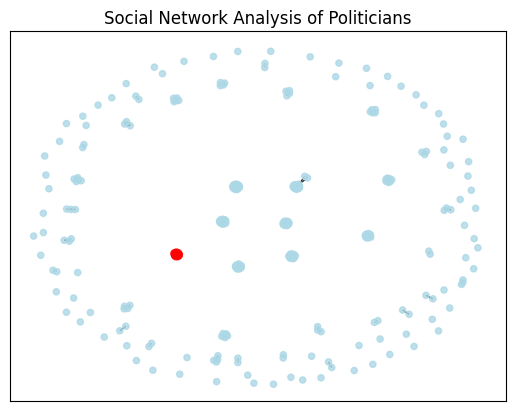

In [ ]:
c = girvan_newman(graph.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
  node_groups.append(list(i))

color_map = []
for node in graph:
    if node in node_groups[0]:
        color_map.append('red')
    else:
        color_map.append('lightblue')
largestcommunity=node_groups[0][0]

pos = nx.spring_layout(graph)
nx.draw_networkx(graph, node_size=20, pos=pos, with_labels=False, node_color=color_map, edge_color='black',alpha=0.8)

plt.title("Social Network Analysis of Politicians")
plt.show()

## **Using Greedy Modularity Algorithm**

In [ ]:
import networkx.algorithms.community as nx_comm

import community.community_louvain as community_louvain

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

list_community_sets_greedy = list(nx_comm.greedy_modularity_communities(graph))

#Printing the First 20 Communities
for i in list_community_sets_greedy:
  print(i,"\n")

frozenset({'Abdul Wahid', 'Bali Ram', 'Bhagwan Singh Majhwar', 'Kailash Maurya', 'Gyan Chandra Varshney', 'Chandrika Prasad', 'Maharaj Singh', 'Habeeburrahman', 'Imtiaz Md. Khan', 'Harendra', 'Mohan Shyam Singh', 'Jagmohan', 'Singh Pal Singh', 'Jitendra Singh', 'Anil Bhardwaj', 'Krantikari Subas', 'Ram Snahi Shakya', 'Buddhi Sagar', 'Suresh Chandra Saraswat Urf Elaichi Wala', 'Kehari', 'Vijay Singh', 'Ram Fere Singh', 'Yuvraj Mishra', 'Bhagwati', 'Dhani Ram', 'Rakesh Kumar S/O Shri Shaitan Singh', 'Raj Narain'}) 

frozenset({'Arjun Singh', 'Ashok Kumar', 'Imratlal Markam', 'Tejendra Singh Bhatiya', 'Kachroo Das Lodhi', 'Ram Bihari Samadhiya (Pappu)', 'K. Shankaer Shukla', 'Babulal Dewangan', 'Shyamlal Chourasia Guruji', 'Raghunath', 'Mohan Singh Yadav', 'Suresh Pol', 'Paras Ram Koli', 'Muni Singh Verma', 'Raghubir Singh Azad', 'Bharatkumar Sulane', 'D. R. Amb', 'Mohammad Naim Qureshi', 'Gallu Khewela', 'Nande', 'Dr. Bidya Nand Tiwari'}) 

frozenset({'Suresh Kr. Srivastava', 'Ajoy Kumar

In [ ]:
partition_greedy = {}
for i, comm in enumerate(list_community_sets_greedy):
    print("Community:", i)
    print("Number of elems",len(comm))
    for n in comm:
        partition_greedy[n]=i

Community: 0
Number of elems 27
Community: 1
Number of elems 21
Community: 2
Number of elems 19
Community: 3
Number of elems 15
Community: 4
Number of elems 13
Community: 5
Number of elems 13
Community: 6
Number of elems 12
Community: 7
Number of elems 10
Community: 8
Number of elems 8
Community: 9
Number of elems 6
Community: 10
Number of elems 5
Community: 11
Number of elems 5
Community: 12
Number of elems 5
Community: 13
Number of elems 4
Community: 14
Number of elems 4
Community: 15
Number of elems 4
Community: 16
Number of elems 4
Community: 17
Number of elems 3
Community: 18
Number of elems 3
Community: 19
Number of elems 3
Community: 20
Number of elems 3
Community: 21
Number of elems 3
Community: 22
Number of elems 3
Community: 23
Number of elems 2
Community: 24
Number of elems 2
Community: 25
Number of elems 2
Community: 26
Number of elems 2
Community: 27
Number of elems 2
Community: 28
Number of elems 2
Community: 29
Number of elems 2
Community: 30
Number of elems 2
Community:

<ipython-input-22-cff9bc414124>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', max(partition_greedy.values()) + 1)


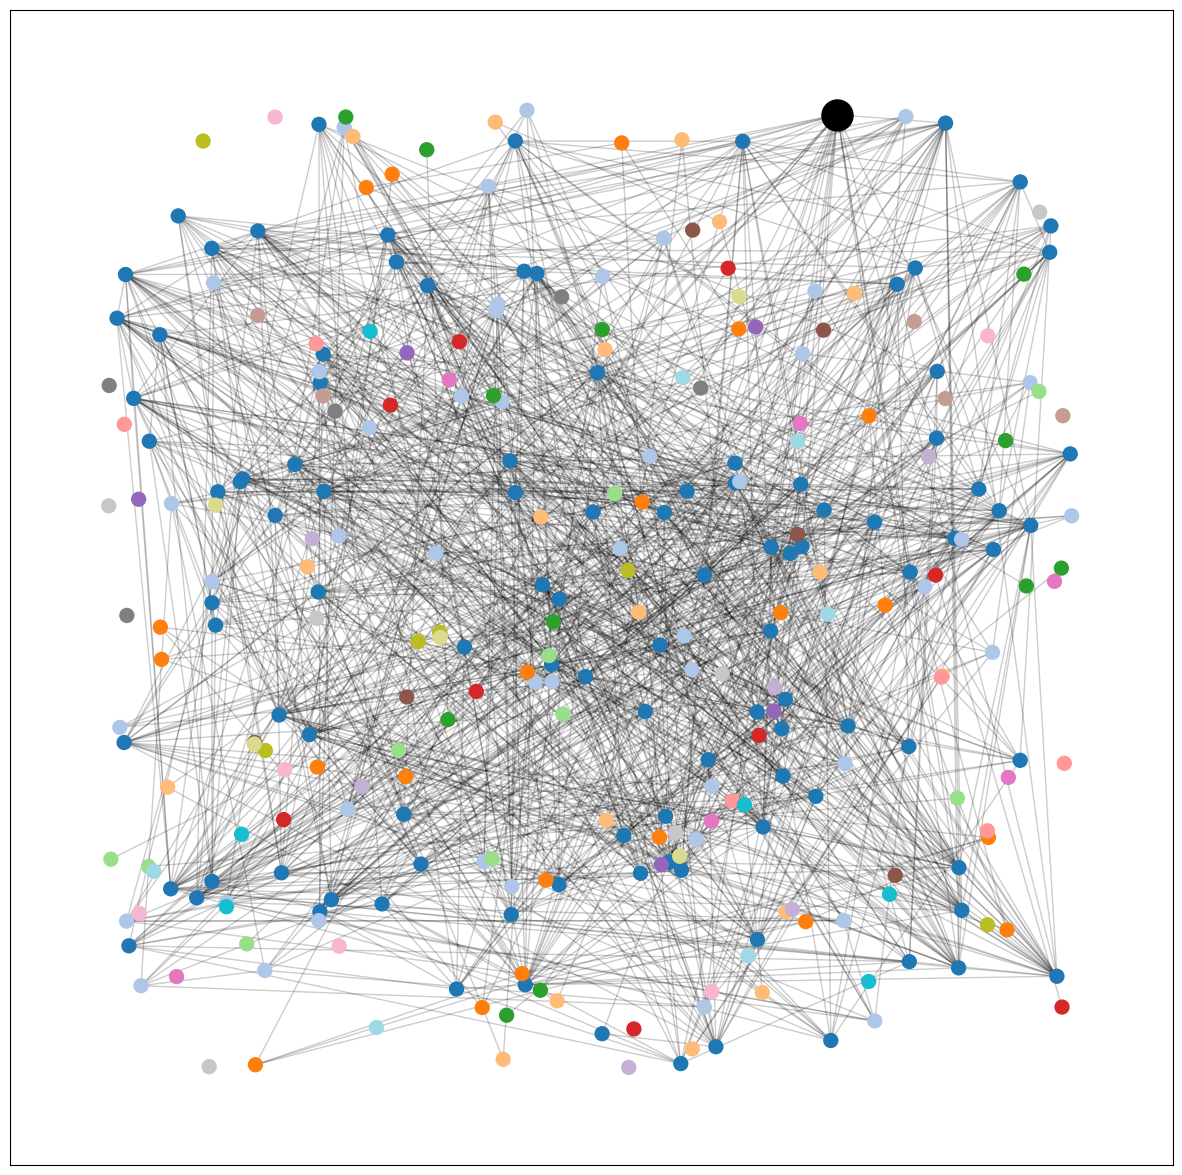

In [ ]:
pos = nx.random_layout(graph)
# color the nodes according to their partition
cmap = cm.get_cmap('tab20', max(partition_greedy.values()) + 1)
plt.figure(figsize=(15,15))

nx.draw_networkx_nodes(graph, pos, partition_greedy.keys(), node_size=100,
                       cmap=cmap, node_color=list(partition_greedy.values()))
nx.draw_networkx_nodes(graph, pos, [list(partition_greedy.keys())[0]], node_size=500,node_color="black")
nx.draw_networkx_edges(graph, pos, alpha=0.2)

plt.show()

## **Using Louvain Community Detection Algorithm**

In [ ]:
partition_library = community_louvain.best_partition(graph)

print(list(partition_library.items())[0:20])

[('Savita', 0), ('Chatap Waman Sadashivrao', 1), ('Ram Raghunath Choudhary', 8), ('Vijai Paswan', 5), ('Satnarayan Sarma', 4), ('Krishan Kumar', 112), ('Lahiri Singh', 0), ('Shariff. M. K', 56), ('Satya Kumar Singh', 5), ('Narayan Gangaram Patil', 123), ('Lal Krishan Advani', 10), ('Bhagwat Jha Azad', 11), ('Ashok Chhaviram Argal', 12), ('Pawan Kumar Sureka', 75), ('M. Ramchander Rao', 4), ('Shokat Ali', 15), ('Murali.V', 56), ('Nazar Imam', 0), ('Thakre Bhaiyyalal Gujobya', 88), ('Sarath Kumar, R.', 19)]


<ipython-input-51-b9e8cede0dc7>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', max(partition_library.values()) + 1)


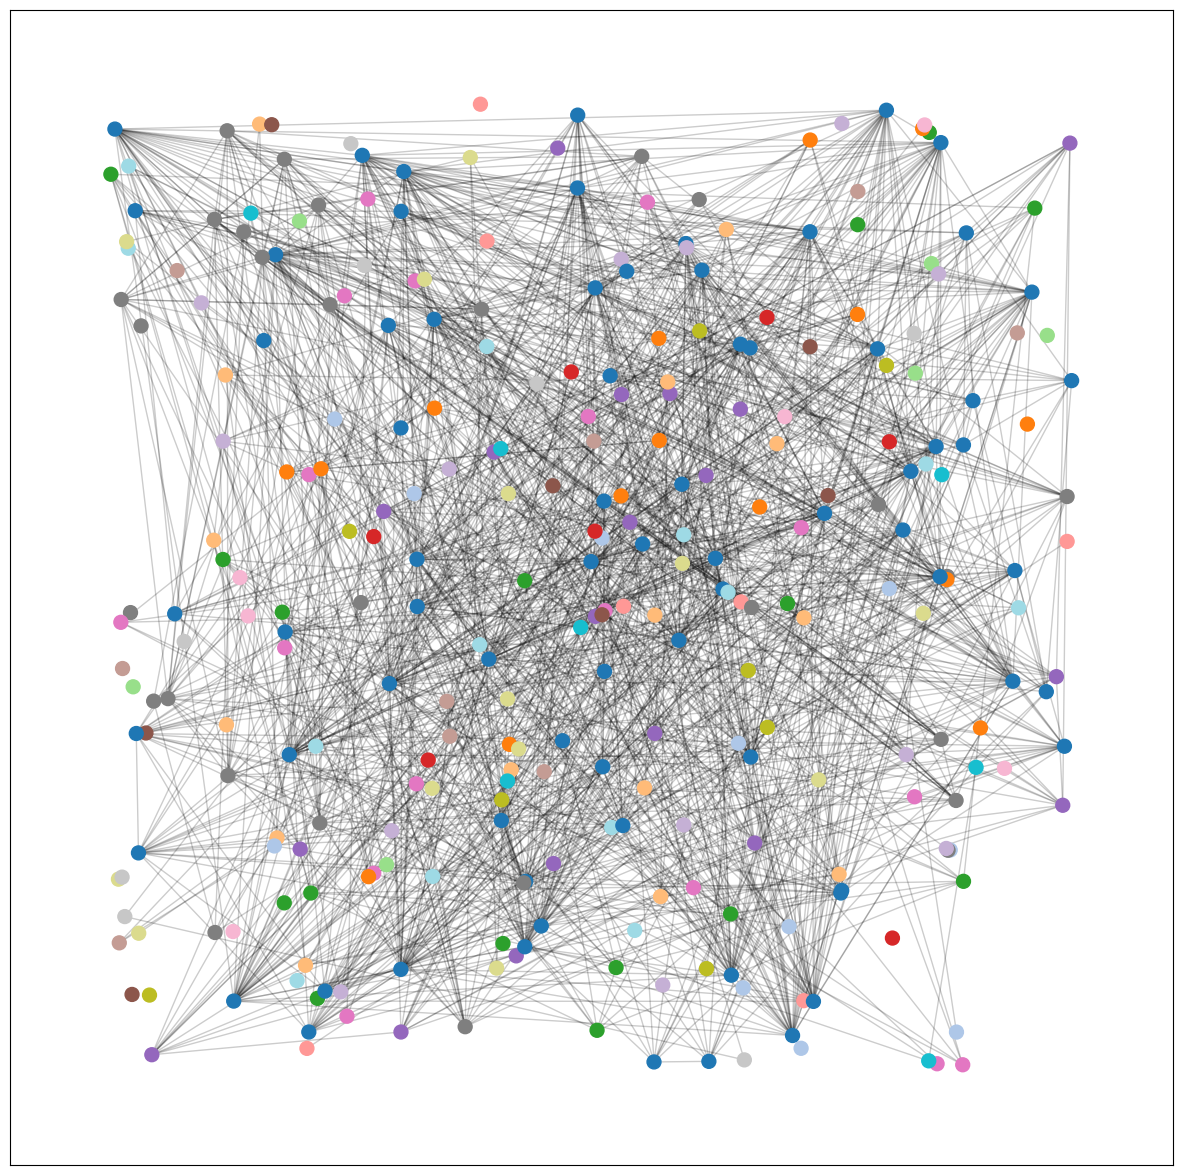

In [ ]:
# Plotting the Graph

pos = nx.random_layout(graph)
# color the nodes according to their partition
cmap = cm.get_cmap('tab20', max(partition_library.values()) + 1)
plt.figure(figsize=(15,15))

nx.draw_networkx_nodes(graph, pos, partition_library.keys(), node_size=100,
                       cmap=cmap, node_color=list(partition_library.values()))
nx.draw_networkx_edges(graph, pos, alpha=0.2)

plt.show()

In [ ]:
comms = set(partition_library.values())
print("Total No of Communities: "+str(len(comms)))

Total No of Communities: 126


In [ ]:
list_community_sets_library = [ set() for i in range(len(comms)) ]

for n, comm in partition_library.items():
    list_community_sets_library[comm].add(n)

pairs = []
for i, nod in enumerate(list_community_sets_library):
    print(i,len(nod))
    comm_size = (i,len(nod))
    pairs.append(comm_size)

0 35
1 1
2 1
3 2
4 12
5 21
6 1
7 1
8 5
9 1
10 1
11 2
12 1
13 1
14 1
15 9
16 2
17 1
18 1
19 3
20 1
21 8
22 1
23 1
24 1
25 1
26 1
27 1
28 1
29 10
30 1
31 1
32 1
33 1
34 1
35 1
36 1
37 1
38 1
39 1
40 2
41 1
42 1
43 1
44 1
45 1
46 2
47 1
48 1
49 1
50 1
51 1
52 1
53 1
54 1
55 1
56 13
57 2
58 7
59 1
60 1
61 1
62 1
63 1
64 1
65 1
66 1
67 1
68 2
69 1
70 1
71 1
72 1
73 1
74 4
75 6
76 1
77 4
78 3
79 1
80 1
81 1
82 1
83 1
84 1
85 1
86 1
87 1
88 18
89 6
90 1
91 1
92 1
93 1
94 1
95 1
96 1
97 1
98 1
99 3
100 1
101 1
102 1
103 1
104 2
105 1
106 1
107 2
108 2
109 2
110 1
111 1
112 5
113 1
114 1
115 1
116 1
117 2
118 1
119 1
120 1
121 1
122 1
123 7
124 1
125 1


Text(0, 0.5, 'Number of nodes')

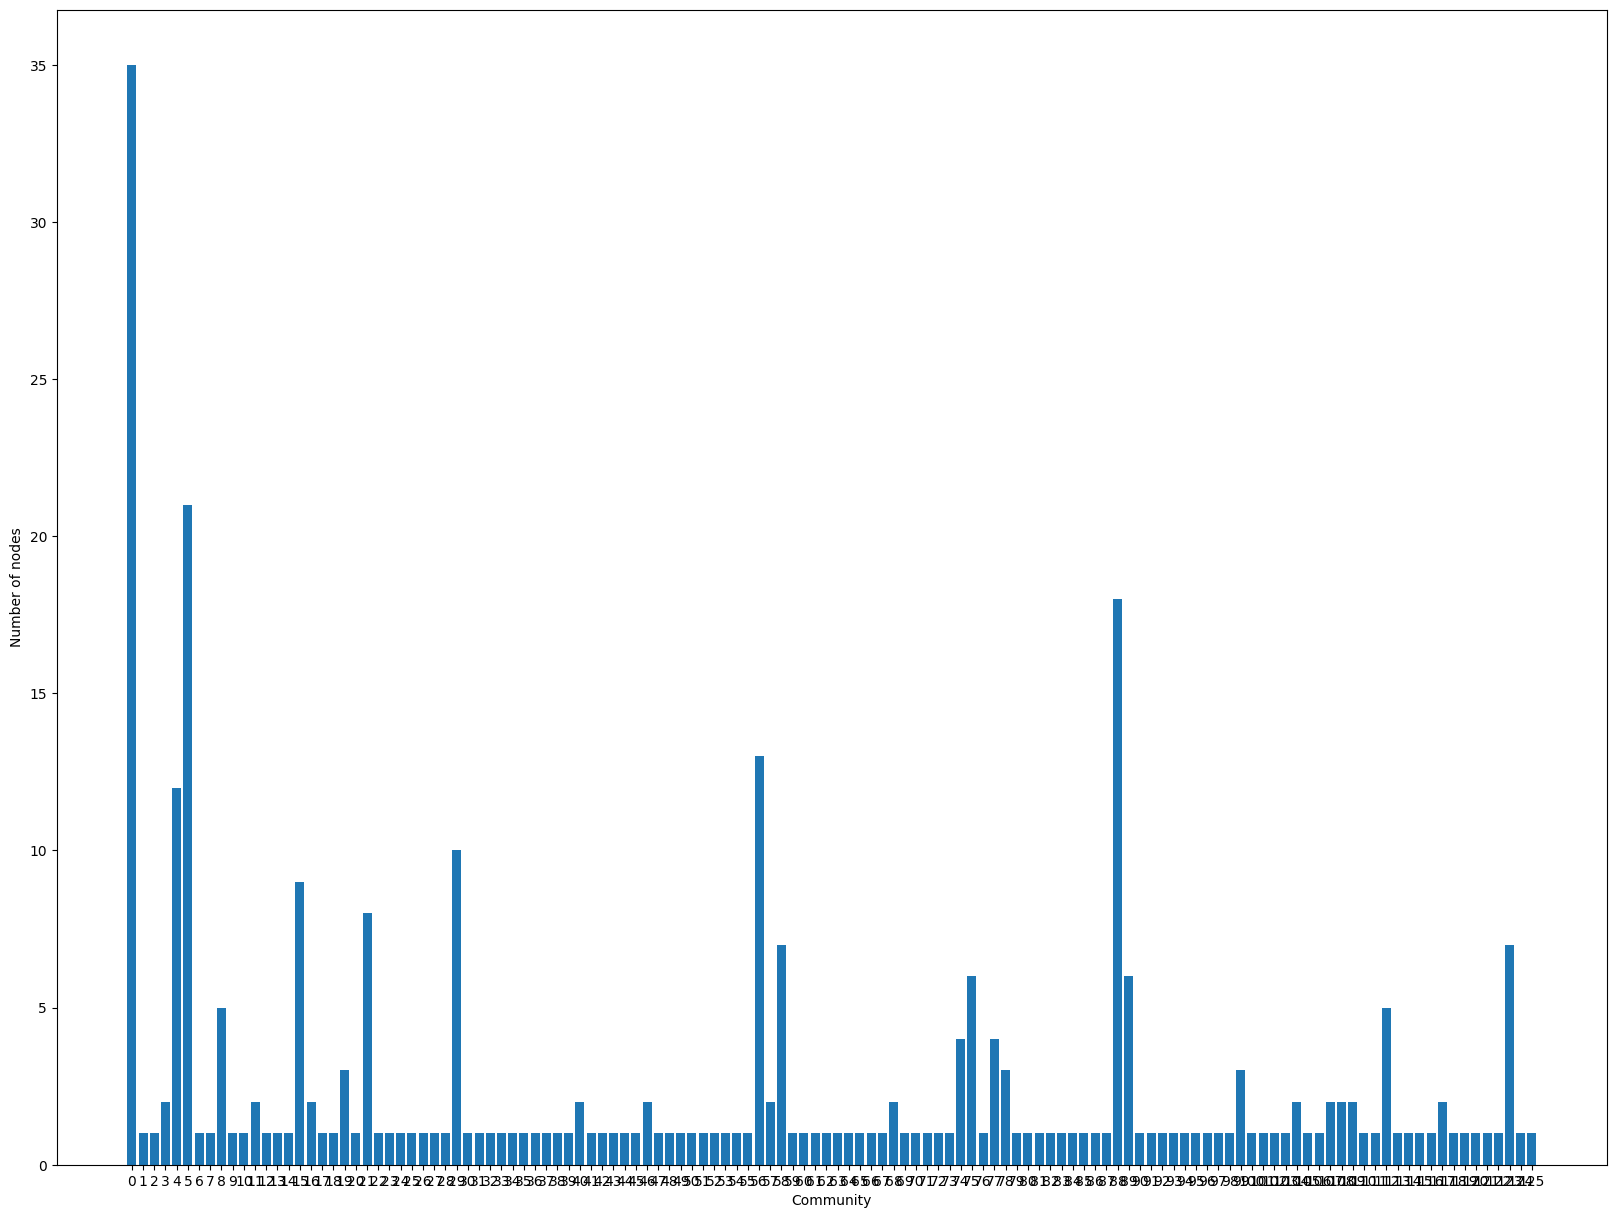

In [ ]:
community_index = []
number_of_nodes = []

for comm, n_nodes in pairs:
    community_index.append(str(comm))
    number_of_nodes.append(n_nodes)
plt.figure(figsize=(20,15))
plt.bar(community_index,number_of_nodes)
plt.xlabel("Community")
plt.ylabel("Number of nodes")

In [ ]:
max_value = max(number_of_nodes)
max_index = number_of_nodes.index(max_value)
print(max_index)
print(max_value)


0
35


<ipython-input-56-fac4d763abe9>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', max(partition_library.values()) + 1)


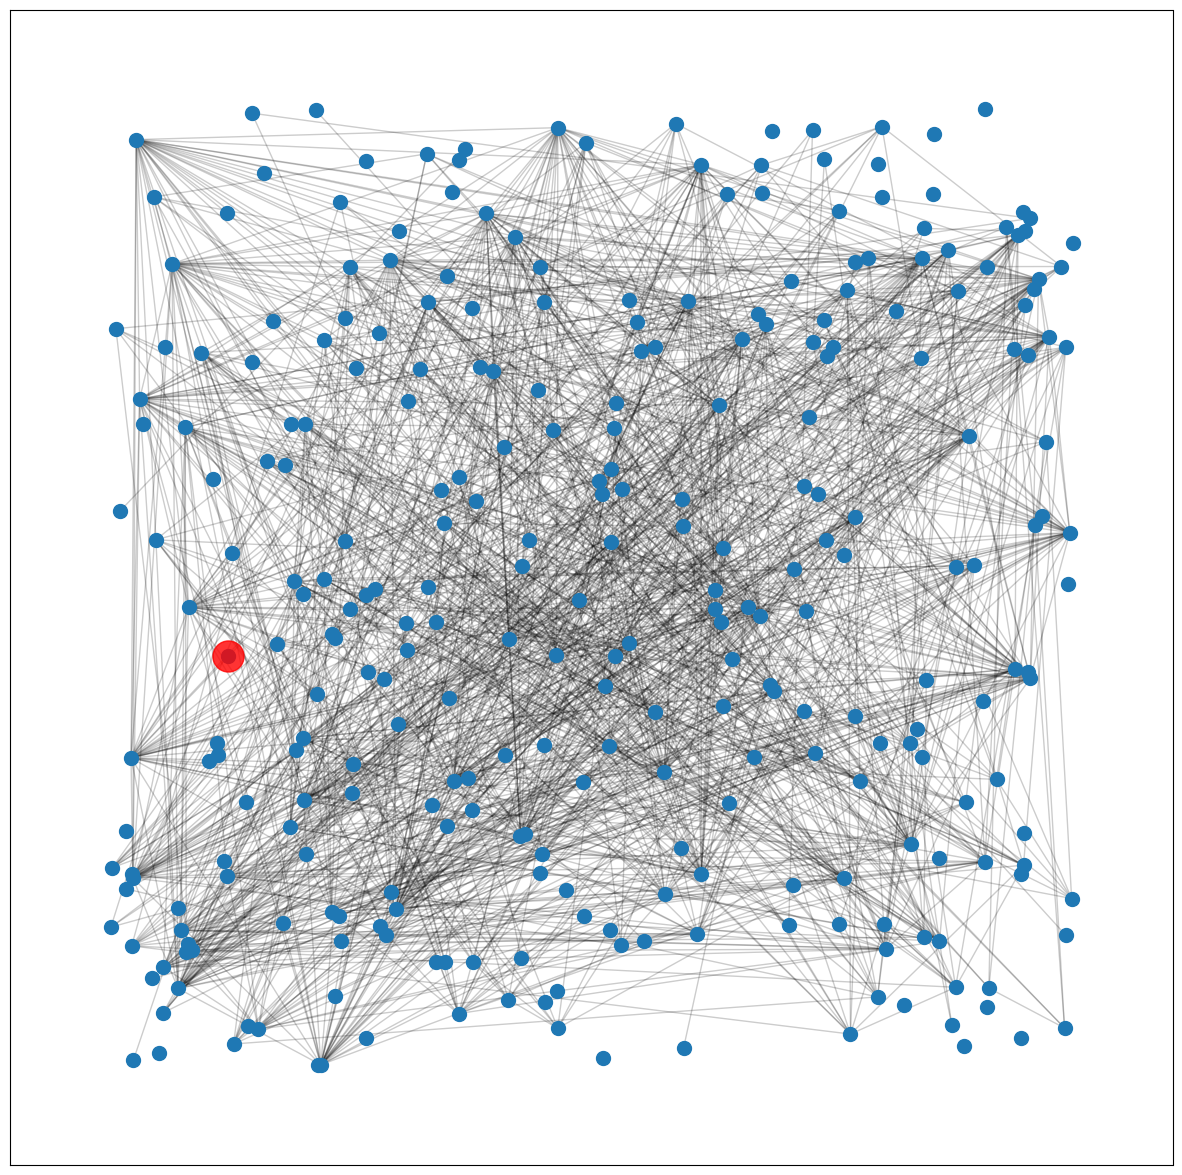

In [ ]:
pos = nx.random_layout(graph)
cmap = cm.get_cmap('tab20', max(partition_library.values()) + 1)
plt.figure(figsize=(15, 15))

largest_community = max(partition_library, key=partition_library.get)

nx.draw_networkx_nodes(graph, pos, node_size=100)
nx.draw_networkx_edges(graph, pos, alpha=0.2)
nx.draw_networkx_nodes(graph, nodelist=[largest_community], node_size=500, pos=pos, node_color='red',alpha=0.8)

plt.show()
